In [18]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AvgPool2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [4]:
labels.head()
labels.info()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


7591 изображение, для каждого есть возраст человека. Посмотрим распределение возрастов в выборке:

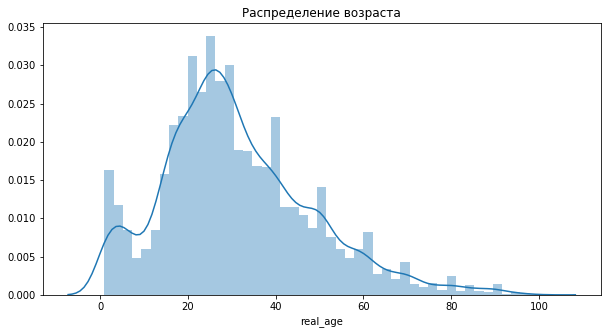

In [5]:
plt.figure(figsize=(10,5))
plt.title('Распределение возраста')
sns.distplot(labels.real_age)
plt.show();

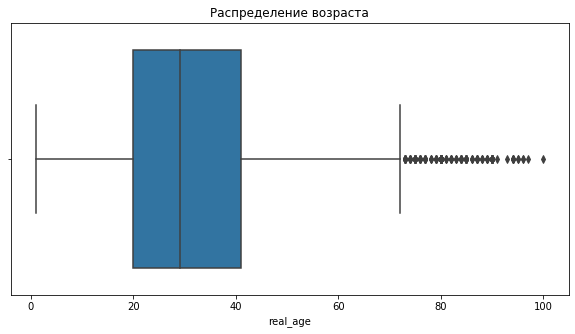

In [12]:
plt.figure(figsize=(10,5))
plt.title('Распределение возраста')
sns.boxplot(labels.real_age)
plt.show();

In [27]:
labels.real_age.describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Минимальный возраст - 1 год, максимальный - 100 лет, средний - 31,2 года, медианный - 29 лет. Распределение не гладкое, есть провал около 8-10 лет, 50% людей возраста 20-41 год.

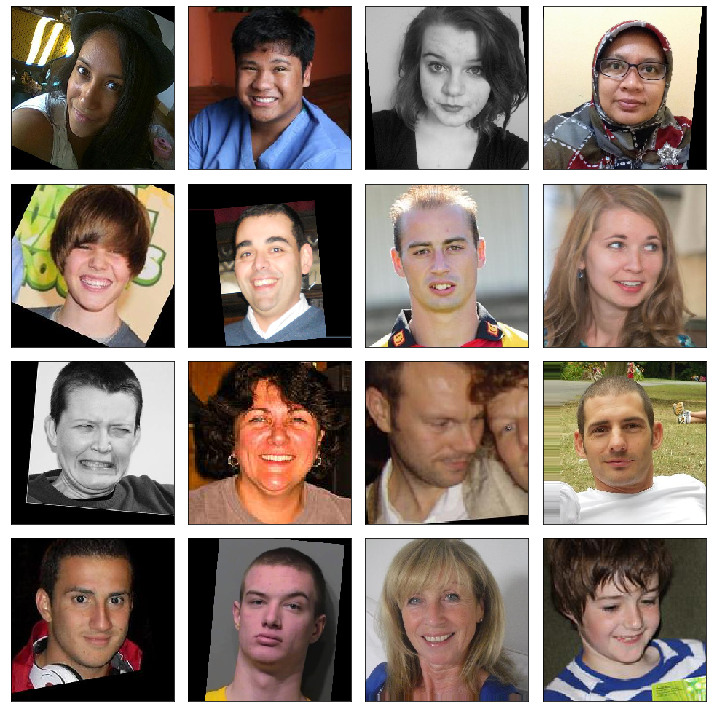

In [26]:
features, target = next(train_gen_flow)
plt.figure(figsize=(10,10))
for i in range(1, 17):
    image = features[i-1]
    plt.subplot(4,4,i)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show();

Скорее всего модель хорошо обучится распознавать людей среднего возраста, тогда как с детьми в возрасте 8-10 лет и пожилыми людьми старше 60 могут быть ошибки, так как фотографий с людьми этих возрасных категории не много.

``2021-01-28 07:00:11.329211: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2021-01-28 07:00:11.330966: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2021-01-28 07:00:15.351705: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-28 07:00:16.003996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-01-28 07:00:16.004077: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-28 07:00:16.004112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-28 07:00:16.006119: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-01-28 07:00:16.006500: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-01-28 07:00:16.008746: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-01-28 07:00:16.010029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-01-28 07:00:16.010105: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-01-28 07:00:16.013522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-01-28 07:00:16.013920: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-01-28 07:00:16.021351: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999990000 Hz
2021-01-28 07:00:16.022011: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5ac9820 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-01-28 07:00:16.022040: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-01-28 07:00:16.140037: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5740770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-01-28 07:00:16.140080: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-01-28 07:00:16.142112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-01-28 07:00:16.142198: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-28 07:00:16.142210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-28 07:00:16.142234: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-01-28 07:00:16.142249: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-01-28 07:00:16.142262: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-01-28 07:00:16.142276: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-01-28 07:00:16.142287: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-01-28 07:00:16.146120: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-01-28 07:00:16.146230: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-28 07:00:16.451612: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-01-28 07:00:16.451673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2021-01-28 07:00:16.451686: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2021-01-28 07:00:16.455580: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/5
2021-01-28 07:00:35.211826: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-28 07:00:35.762099: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 122s - loss: 250.6865 - mae: 11.1994 - val_loss: 976.7007 - val_mae: 26.5137
Epoch 2/5
178/178 - 43s - loss: 64.0485 - mae: 6.0225 - val_loss: 760.6632 - val_mae: 22.5801
Epoch 3/5
178/178 - 43s - loss: 31.1380 - mae: 4.3013 - val_loss: 391.3469 - val_mae: 14.7692
Epoch 4/5
178/178 - 43s - loss: 19.0942 - mae: 3.3551 - val_loss: 113.8317 - val_mae: 8.1714
Epoch 5/5
178/178 - 44s - loss: 13.6032 - mae: 2.8562 - val_loss: 102.9331 - val_mae: 7.6720
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 11s - loss: 102.9331 - mae: 7.6720
Test MAE: 7.6720``

In [7]:
import numpy as np
np.log(0.1)

-2.3025850929940455

In [8]:
from PIL import Image

In [17]:
# image = Image.open('/datasets/ds_cv_images/face.png')
array = np.array(image)
# print(array)
image = Image.open('appa-real-release/all_photo/007612.jpg')
array[1][1]

array([68, 45, 55], dtype=uint8)

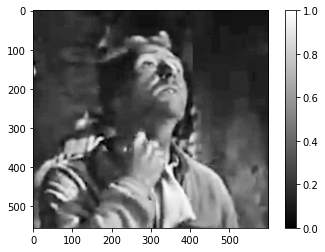

In [36]:
plt.imshow(array[:,:,1],cmap='gray')
plt.colorbar()
plt.show();

In [30]:
array = array/255

In [46]:
s = np.random.randn(100)
s

array([ 0.36600706, -0.00891493,  1.48631668,  0.58123713,  0.89046214,
        0.05170067, -1.51557151,  0.72406004,  1.34543214, -1.03028508,
       -1.12811873, -1.72563332,  1.1980868 , -0.93720067,  0.64994507,
        0.70417022,  0.36585099,  0.751195  , -0.11720697, -0.71239119,
       -1.21722275,  0.14382858,  0.34288395, -0.48517653, -0.08758207,
        0.27800756,  0.13367658,  0.25693156, -0.16549535, -0.92250976,
       -1.63868998,  0.00600574,  0.88319352, -0.62014072, -0.64120826,
        1.23845446,  0.48746606,  1.05968708,  0.35170845, -0.20453039,
        0.416959  ,  1.51194013,  0.06440462, -1.8760885 ,  1.07742052,
        1.09887884, -0.07436694, -0.28416146, -0.62496319, -0.57492171,
        1.06191759,  0.46307522,  0.06131821, -0.10576382, -0.38511466,
       -1.12241896,  0.9404224 , -0.34794457, -1.3868381 , -0.47567689,
        0.95549161,  0.43633835,  0.59949838, -1.56951573,  0.02670615,
        1.52897519, -3.13437354,  0.7795047 ,  1.027971  ,  0.38

In [43]:
s.reshape(-1, 5,2)

array([[[4, 9],
        [8, 4],
        [8, 6],
        [8, 3],
        [2, 2]],

       [[3, 6],
        [7, 3],
        [4, 2],
        [9, 5],
        [9, 1]],

       [[4, 2],
        [3, 8],
        [6, 2],
        [4, 5],
        [7, 7]],

       [[1, 4],
        [6, 7],
        [7, 5],
        [3, 9],
        [4, 8]],

       [[6, 7],
        [1, 4],
        [1, 1],
        [7, 6],
        [8, 5]],

       [[2, 3],
        [9, 8],
        [3, 8],
        [7, 3],
        [1, 5]],

       [[4, 4],
        [9, 7],
        [5, 8],
        [9, 1],
        [2, 5]],

       [[8, 8],
        [9, 9],
        [8, 7],
        [9, 5],
        [5, 2]],

       [[1, 4],
        [6, 7],
        [8, 4],
        [7, 3],
        [9, 2]],

       [[6, 8],
        [2, 1],
        [3, 8],
        [3, 9],
        [9, 2]]])